<a href="https://colab.research.google.com/github/Poohi5/cmpe257/blob/master/TopicNamingForTopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic Naming for Topic Modelling

Used 3 Articles from "State of the Union Corpus" Kaggle dataset for Topic Modeling using LDA.

The Articles can be accessed from the link below:

https://www.kaggle.com/rtatman/state-of-the-union-corpus-1989-2017



###Importing all necessary libraries

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/file/d/1v56DSUQt3odRhCcSQiekofwCvpXMEAoW/view?usp=sharing'


Three articles namely 'Obama_2014', 'Obama_2016', 'Trump_2017' were merged into a single file called 'Merge.txt' and is saved in shared  Google drive folder. 



In [0]:
downloaded = drive.CreateFile({'id':"1v56DSUQt3odRhCcSQiekofwCvpXMEAoW"}) 
downloaded.GetContentFile('Merge.txt')

Import regular expression 

In [0]:
import re

Import Numpy and Pandas Modules

In [0]:
import pandas as pd
import numpy as np
df = pd.read_fwf('Merge.txt')


##Data Preprocessing

Converting txt to csv file

In [0]:
df.to_csv('Merge.csv')

In [0]:
data = pd.read_csv('Merge.csv',header=None)

In [0]:
data['text'] = data[1]

In [0]:
data['text'] = data['text'].map(lambda x: re.sub('[,\.!?]', '', x))

In [0]:
data['text'] = data['text'].map(lambda x: x.lower())

In [13]:
data['text'].head()

0    mr speaker mr vice president members of congre...
1                                           americans:
2    today in america a teacher spent extra time wi...
3    it and did her part to lift america's graduati...
4                     level in more than three decades
Name: text, dtype: object

##Latent Dirichlet Allocation [LDA]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Converted a list of titles into a list of vectors with length equal to the vocabulary. 
Then plotted the 10 most common words based on the list of document vectors.

Reference https://towardsdatascience.com/the-hottest-topics-in-machine-learning-866ae21ba22d

###Plotting top 10 common words

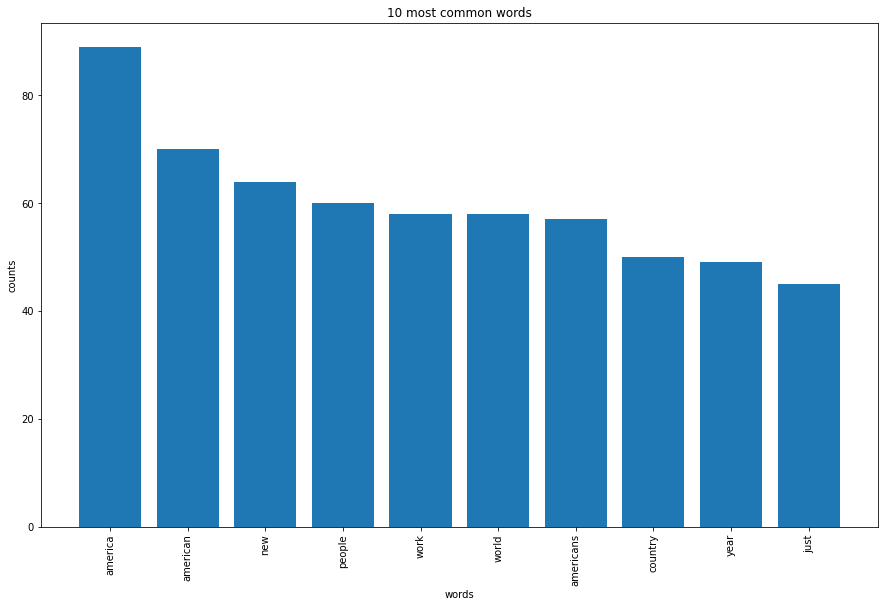

In [17]:
def Plot(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

count_vectorizer = CountVectorizer(stop_words='english') #count vectorizer with stop words
count_data = count_vectorizer.fit_transform(data['text'])
Plot(count_data, count_vectorizer)


**Figure Above** shows the top most words in the Corpus are America, American, new, people, work, world, americans, country, year,.. This gives a context that the topics mostly talks about the Nation America and it's people

###Applying a LDA model 

In [18]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
l = []
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        l.append(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 10 #We will have 10 topics from these articles
number_words = 10 #Number of words per Topic = 10
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)
print("Topics found via LDA for the articles:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA for the articles:

Topic #0:
just workers change want years day past businesses world americans

Topic #1:
americans america just nation people help know energy great good

Topic #2:
work help years high economy want access states working make

Topic #3:
new make people ve national world country americans american fair

Topic #4:
year work congress american tonight war god believe people republicans

Topic #5:
new jobs time america american business leaders americans ll future

Topic #6:
people american believe america right ve military want security opportunity

Topic #7:
let year ve immigration americans right work job working time

Topic #8:
country make america economy way communities great allies let new

Topic #9:
america world like job years country support come work american


**Output Above** from **LDA** shows 10 topics identified with corresponding words 

##Based on the words in the topics above, manually labelled the topics and saved as a csv file in a shared folder in Google Drive
####Link to the Manually Labelled topics

In [0]:
link = 'https://drive.google.com/file/d/13exn9tpHYLnKbRpxZTGmdxP96oTiW7AD/view?usp=sharing'

In [0]:
downloaded = drive.CreateFile({'id':"13exn9tpHYLnKbRpxZTGmdxP96oTiW7AD"}) 
downloaded.GetContentFile('LDALabellingNB.csv')

Get the csv file in pandas dataframe

In [0]:
df_new =pd.read_csv('LDALabellingNB.csv')

In [23]:
df_new

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10
0,Job assurance,job,new,make,workers,today,work,united,americans,states,years
1,Congress Power,america,world,future,help,year,protect,congress,power,care,states
2,American People,year,work,just,want,know,make,people,states,america,years
3,Leadership,american,believe,business,country,tax,security,america,leadership,make,new
4,Health,american,people,america,world,right,jobs,years,new,need,health
5,Government Support,time,years,change,long,year,great,govenment,mr,support,ve
6,Democrats,americans,work,people,tonight,new,nation,democrats,congress,childern,health
7,World War II,families,america,let,war,work,world,country,make,ll,going
8,Diplomacy,like,american,ll,america,country,just,help,diplomacy,support,time
9,Security,security,americans,god,time,ve,things,bless,new,country,come


###Import nltk and gensim Libraries for Topic Naming using the manually labelled CSV files and the topics from LDA model

In [24]:
!pip install nltk
!pip install gensim

In [25]:
import nltk
import gensim
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df_new['LDA_Labels']=df_new.Word1 + ' ' + df_new.Word2 +' ' + df_new.Word3 +' ' + df_new.Word4 +' ' + df_new.Word5 +' ' + df_new.Word6 +' ' + df_new.Word7 +' ' + df_new.Word8 +' ' + df_new.Word9 +' ' + df_new.Word10

In [27]:
df_new.columns

Index(['Label', 'Word1', 'Word2', 'Word3', 'Word4', 'Word5', 'Word6', 'Word7',
       'Word8', 'Word9', 'Word10', 'LDA_Labels'],
      dtype='object')

Tokenizing the words and converting the words into Lower Case

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
tokens = [[w.lower() for w in word_tokenize(text)] for text in df_new.LDA_Labels]

In [29]:
tokens

[['job',
  'new',
  'make',
  'workers',
  'today',
  'work',
  'united',
  'americans',
  'states',
  'years'],
 ['america',
  'world',
  'future',
  'help',
  'year',
  'protect',
  'congress',
  'power',
  'care',
  'states'],
 ['year',
  'work',
  'just',
  'want',
  'know',
  'make',
  'people',
  'states',
  'america',
  'years'],
 ['american',
  'believe',
  'business',
  'country',
  'tax',
  'security',
  'america',
  'leadership',
  'make',
  'new'],
 ['american',
  'people',
  'america',
  'world',
  'right',
  'jobs',
  'years',
  'new',
  'need',
  'health'],
 ['time',
  'years',
  'change',
  'long',
  'year',
  'great',
  'govenment',
  'mr',
  'support',
  've'],
 ['americans',
  'work',
  'people',
  'tonight',
  'new',
  'nation',
  'democrats',
  'congress',
  'childern',
  'health'],
 ['families',
  'america',
  'let',
  'war',
  'work',
  'world',
  'country',
  'make',
  'll',
  'going'],
 ['like',
  'american',
  'll',
  'america',
  'country',
  'just',
  'help'

In [0]:
dict = gensim.corpora.Dictionary(tokens)


In [31]:
print(dict.token2id)

{'americans': 0, 'job': 1, 'make': 2, 'new': 3, 'states': 4, 'today': 5, 'united': 6, 'work': 7, 'workers': 8, 'years': 9, 'america': 10, 'care': 11, 'congress': 12, 'future': 13, 'help': 14, 'power': 15, 'protect': 16, 'world': 17, 'year': 18, 'just': 19, 'know': 20, 'people': 21, 'want': 22, 'american': 23, 'believe': 24, 'business': 25, 'country': 26, 'leadership': 27, 'security': 28, 'tax': 29, 'health': 30, 'jobs': 31, 'need': 32, 'right': 33, 'change': 34, 'govenment': 35, 'great': 36, 'long': 37, 'mr': 38, 'support': 39, 'time': 40, 've': 41, 'childern': 42, 'democrats': 43, 'nation': 44, 'tonight': 45, 'families': 46, 'going': 47, 'let': 48, 'll': 49, 'war': 50, 'diplomacy': 51, 'like': 52, 'bless': 53, 'come': 54, 'god': 55, 'things': 56}


In [32]:
print(dict.filter_tokens)

<bound method Dictionary.filter_tokens of <gensim.corpora.dictionary.Dictionary object at 0x7f74c30877f0>>


In [33]:
print(dict.values)

<bound method Mapping.values of <gensim.corpora.dictionary.Dictionary object at 0x7f74c30877f0>>


###To convert tokenized topics to vectors to use for Finding Cosine similarity and TF_IDF

In [0]:
corpus = [dict.doc2bow(tokens) for tokens in tokens]

###TF-IDF [Term Frequency and Inverse Document Frequency]

In [35]:
tf_idf = gensim.models.TfidfModel(corpus)
for doc in tf_idf[corpus]:
    print([[dict[id], np.around(freq, decimals=2)] for id, freq in doc])

[['americans', 0.23], ['job', 0.44], ['make', 0.18], ['new', 0.13], ['states', 0.23], ['today', 0.44], ['united', 0.44], ['work', 0.18], ['workers', 0.44], ['years', 0.18]]
[['states', 0.22], ['america', 0.09], ['care', 0.41], ['congress', 0.29], ['future', 0.41], ['help', 0.29], ['power', 0.41], ['protect', 0.41], ['world', 0.22], ['year', 0.22]]
[['make', 0.2], ['states', 0.27], ['work', 0.2], ['years', 0.2], ['america', 0.11], ['year', 0.27], ['just', 0.36], ['know', 0.51], ['people', 0.27], ['want', 0.51]]
[['make', 0.17], ['new', 0.13], ['america', 0.1], ['american', 0.23], ['believe', 0.44], ['business', 0.44], ['country', 0.17], ['leadership', 0.44], ['security', 0.31], ['tax', 0.44]]
[['new', 0.14], ['years', 0.19], ['america', 0.1], ['world', 0.24], ['people', 0.24], ['american', 0.24], ['health', 0.33], ['jobs', 0.47], ['need', 0.47], ['right', 0.47]]
[['years', 0.15], ['year', 0.2], ['change', 0.39], ['govenment', 0.39], ['great', 0.39], ['long', 0.39], ['mr', 0.39], ['suppo

Reference https://dev.to/coderasha/compare-documents-similarity-using-python-nlp-4odp

Using Gensim library to find similarity between the labels and the words generated from LDA Topic Modeling

In [37]:
sims = gensim.similarities.Similarity('.',tf_idf[corpus],
                                        num_features=len(dict))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


###Feeding some sentences from the test article and finding the TF-IDF 

Creatiin Query Document

In [0]:
mat = []

file1=['Thank you very much. Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States']
file2=['I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart']
file3=['But then the quiet voices became a loud chorus, as thousands of citizens now spoke out together, from cities small and large, all across our country']
file=[file1,file2,file3]
def IsSimilarText(sentences):
  for sentence in sentences:
    tokens = sent_tokenize(sentence)
    for line in tokens:
        mat.append(line)
  print("\nNumber of documents:",len(mat))  
  for line in mat:
      query_doc = [w.lower() for w in word_tokenize(line)]
      query_doc_bow = dict.doc2bow(query_doc) 
  query_doc_tf_idf = tf_idf[query_doc_bow]
  max_number = float('-inf')
  label=-1
  for i,j in enumerate(sims[query_doc_tf_idf]):
    print('Similarity with ',i,'the Label is',j)
    if j > max_number:
      label = i
      max_number = j
  print("\nLabel for this Topic is:",df_new.Label[label])

In [39]:
print("Printing all labels:\n",df_new.Label)
for i in file:
  print("\n",i,"\n")
  IsSimilarText(i)

Printing all labels:
 0         Job assurance
1        Congress Power
2       American People
3            Leadership
4                Health
5    Government Support
6             Democrats
7          World War II
8             Diplomacy
9              Security
Name: Label, dtype: object

 ['Thank you very much. Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States'] 


Number of documents: 2
Similarity with  0 the Label is 0.42427853
Similarity with  1 the Label is 0.23740247
Similarity with  2 the Label is 0.105203815
Similarity with  3 the Label is 0.0
Similarity with  4 the Label is 0.0
Similarity with  5 the Label is 0.0
Similarity with  6 the Label is 0.15318702
Similarity with  7 the Label is 0.0
Similarity with  8 the Label is 0.0
Similarity with  9 the Label is 0.0

Label for this Topic is: Job assurance

 ['I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart'] 


Number of documen

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


**Output Above** shows that using the Manually labeled Topics and the Words generated from the LDA model are used on Test file to predict the Topic names for the Test file based on Similarity notion